<a href="https://colab.research.google.com/github/kowsalyamurugann/Ex-07-Feature-Selection/blob/main/DSexp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.drop('Cabin',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S
887,1,1,female,19.0,0,30.0000,S
888,0,3,female,NaN,1,23.4500,S
889,1,1,male,26.0,0,30.0000,C


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

<Axes: title={'center': 'Dataset with outliers'}>

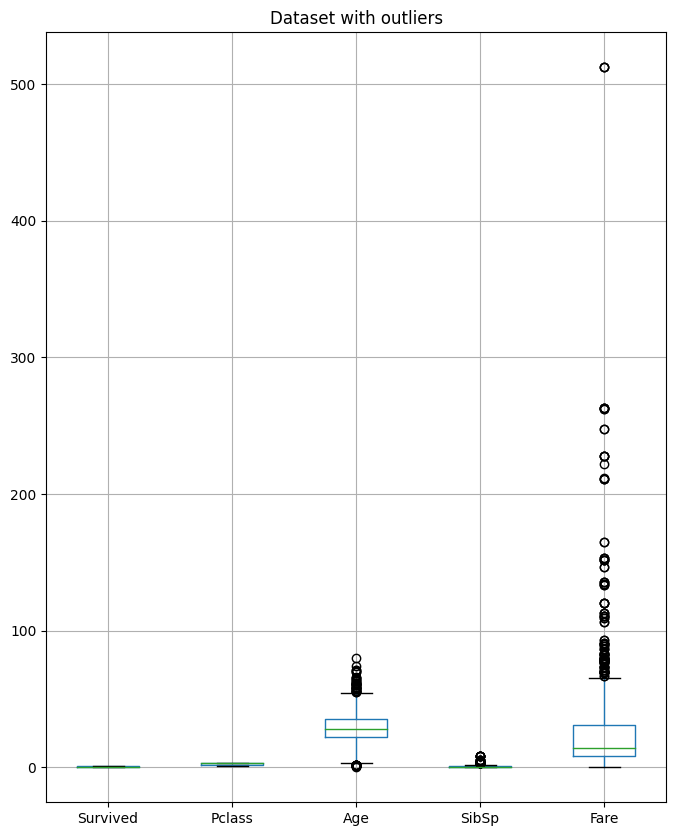

In [ ]:
plt.title("Dataset with outliers")
df.boxplot()

<Axes: title={'center': 'Dataset after removing outliers'}>

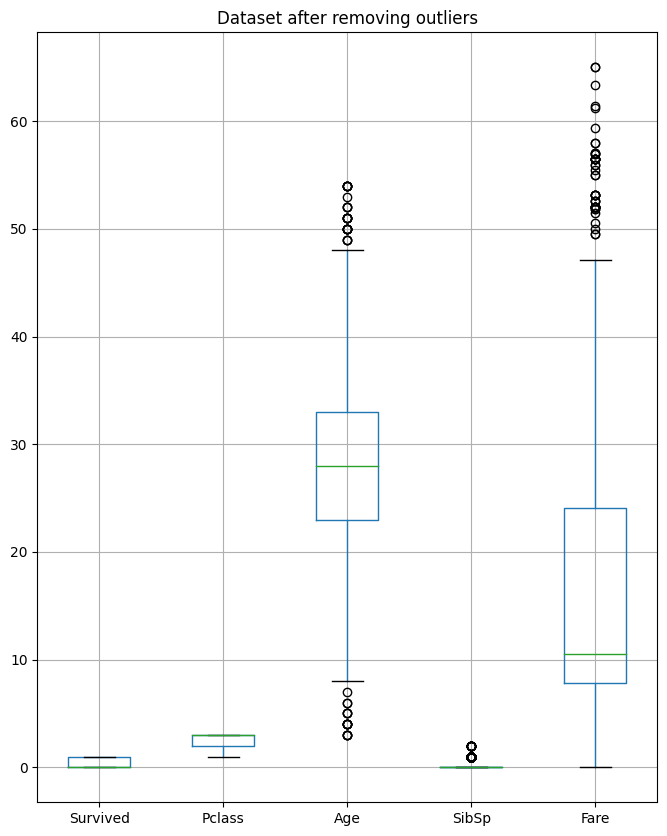

In [ ]:
plt.show()
cols = ['Age','SibSp','Fare']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.title("Dataset after removing outliers")
df.boxplot()

In [ ]:
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
climate = ['C','S','Q']
en= OrdinalEncoder(categories = [climate])
df['Embarked']=en.fit_transform(df[["Embarked"]])
df

<ipython-input-132-4bb234b57768>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked']=en.fit_transform(df[["Embarked"]])


,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,1.0
2,1,3,female,26.0,0,7.9250,1.0
3,1,1,female,35.0,1,53.1000,1.0
4,0,3,male,35.0,0,8.0500,1.0
5,0,3,male,28.0,0,8.4583,2.0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,1.0
887,1,1,female,19.0,0,30.0000,1.0
888,0,3,female,28.0,1,23.4500,1.0
889,1,1,male,26.0,0,30.0000,0.0


In [ ]:
climate = ['male','female']
en= OrdinalEncoder(categories = [climate])
df['Sex']=en.fit_transform(df[["Sex"]])
df

<ipython-input-133-8de12a86c0bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']=en.fit_transform(df[["Sex"]])


,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0.0,22.0,1,7.2500,1.0
2,1,3,1.0,26.0,0,7.9250,1.0
3,1,1,1.0,35.0,1,53.1000,1.0
4,0,3,0.0,35.0,0,8.0500,1.0
5,0,3,0.0,28.0,0,8.4583,2.0
...,...,...,...,...,...,...,...
886,0,2,0.0,27.0,0,13.0000,1.0
887,1,1,1.0,19.0,0,30.0000,1.0
888,0,3,1.0,28.0,1,23.4500,1.0
889,1,1,0.0,26.0,0,30.0000,0.0


In [ ]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
df=pd.DataFrame(sc.fit_transform(df),columns=['Survived','Pclass','Sex','Age','SibSp','Fare','Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0.0,0.0,0.0,-0.6,1.0,-0.200824,0.0
1,1.0,0.0,1.0,-0.2,0.0,-0.159115,0.0
2,1.0,-2.0,1.0,0.7,1.0,2.632343,0.0
3,0.0,0.0,0.0,0.7,0.0,-0.151391,0.0
4,0.0,0.0,0.0,0.0,0.0,-0.126161,1.0
...,...,...,...,...,...,...,...
687,0.0,-1.0,0.0,-0.1,0.0,0.154480,0.0
688,1.0,-2.0,1.0,-0.9,0.0,1.204946,0.0
689,0.0,0.0,1.0,0.0,1.0,0.800208,0.0
690,1.0,-2.0,0.0,-0.2,0.0,1.204946,-1.0


In [ ]:
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer(output_distribution='normal',n_quantiles=692)
df1=pd.DataFrame()
df1["Survived"]=np.sqrt(df["Survived"])
df1["Pclass"],parameters=stats.yeojohnson(df["Pclass"])
df1["Sex"]=np.sqrt(df["Sex"])
df1["Age"]=df["Age"]
df1["SibSp"],parameters=stats.yeojohnson(df["SibSp"])
df1["Fare"],parameters=stats.yeojohnson(df["Fare"])
df1["Embarked"]=df["Embarked"]
df1.skew()

Survived    0.658537
Pclass     -0.562623
Sex         0.805353
Age         0.265991
SibSp       1.166560
Fare        0.018885
Embarked   -0.111527
dtype: float64

In [ ]:
import matplotlib
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
X = df1.drop("Survived",1)
y = df1["Survived"]
plt.figure(figsize=(12,10))

<ipython-input-136-d3583aa14588>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df1.drop("Survived",1)


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

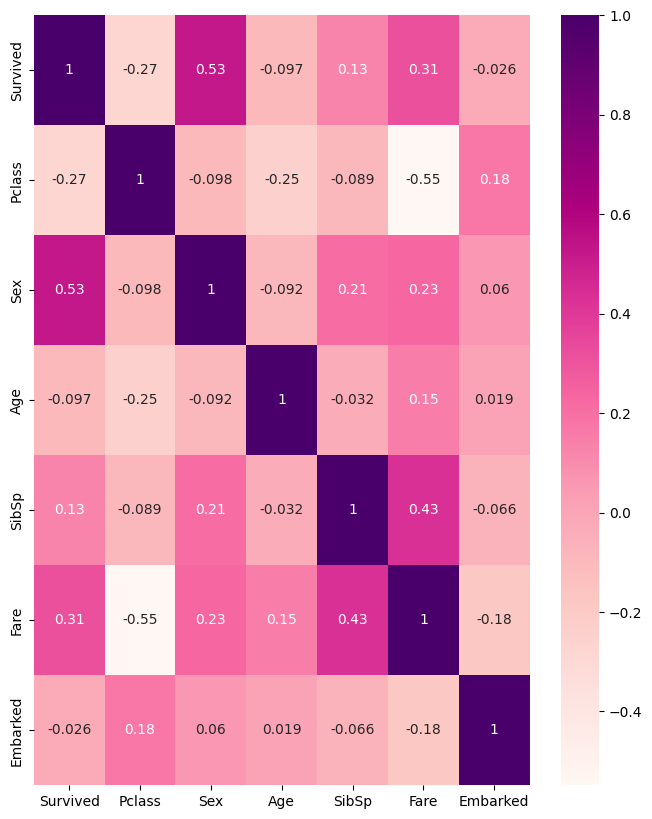

In [ ]:
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdPu)
plt.show()

In [ ]:
cor_target = abs(cor["Survived"])
relevant_features = cor_target[cor_target>0.5]
relevant_features
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()
model.pvalues

const       3.565235e-08
Pclass      3.674624e-06
Sex         1.118233e-42
Age         1.636699e-04
SibSp       1.025286e-01
Fare        5.608883e-04
Embarked    9.565852e-01
dtype: float64

In [ ]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
  p= []
  X_1 = X[cols]
  X_1 = sm.add_constant(X_1)
  model = sm.OLS(y,X_1).fit()
  p = pd.Series(model.pvalues.values[1:],index = cols)
  pmax = max(p)
  feature_with_p_max = p.idxmax()
  if(pmax>0.05):
    cols.remove(feature_with_p_max)
  else:
    break
selected_features_BE = cols
print(selected_features_BE)

['Pclass', 'Sex', 'Age', 'Fare']


In [ ]:
model = LinearRegression()
rfe = RFE(model,step= 4)
X_rfe = rfe.fit_transform(X,y)
model.fit(X_rfe,y)
print(rfe.support_)

[ True  True False  True False False]


In [ ]:
print(rfe.ranking_)

[1 1 2 1 2 2]


In [ ]:
nof_list=np.arange(1,6)
high_score=0
nof=0
score_list =[]
for n in range(len(nof_list)):
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
  model = LinearRegression()
  rfe = RFE(model,step=nof_list[n])
  X_train_rfe = rfe.fit_transform(X_train,y_train)
  X_test_rfe = rfe.transform(X_test)
  model.fit(X_train_rfe,y_train)
  score = model.score(X_test_rfe,y_test)
  score_list.append(score)
  if(score>high_score):
    high_score = score
    nof = nof_list[n]
print("Optimum number of features: %d" %nof)

Optimum number of features: 1


In [ ]:
print("Score with %d features: %f" % (nof, high_score))

Score with 1 features: 0.344046


In [ ]:
cols = list(X.columns)
model = LinearRegression()
rfe = RFE(model, step=2)
X_rfe = rfe.fit_transform(X,y)
model.fit(X_rfe,y)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Pclass', 'Sex', 'SibSp'], dtype='object')


Best alpha using built-in LassoCV: 0.002683
Best score using built-in LassoCV: 0.346165
Lasso picked 4 variables and eliminated the other 2 variables


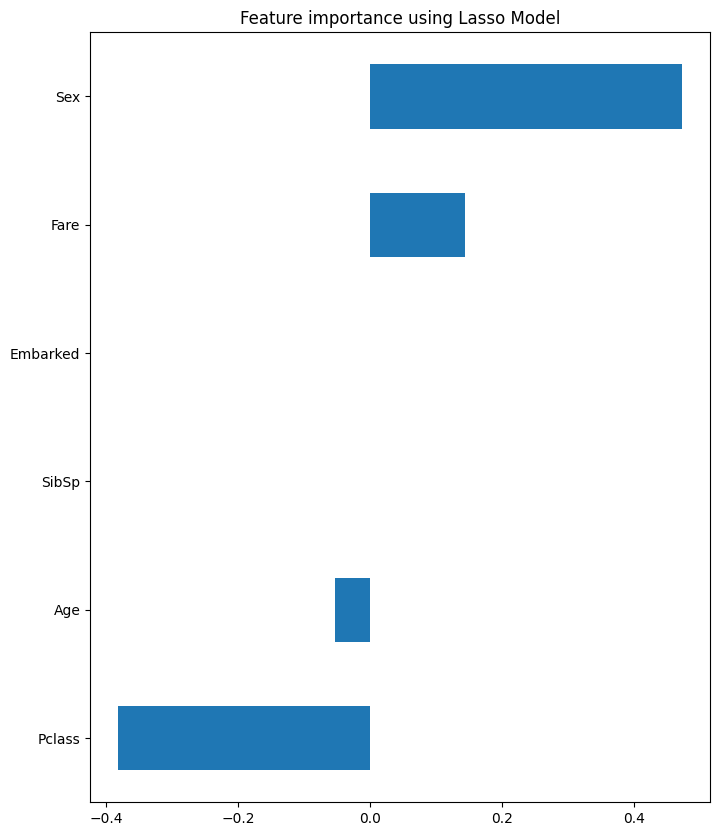

In [ ]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.drop('carwidth',axis=1,inplace=True)
df.drop('curbweight',axis=1,inplace=True)
df.drop('enginesize',axis=1,inplace=True)
df.drop('cylindernumber',axis=1,inplace=True)
df.drop('price',axis=1,inplace=True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,carheight,enginetype,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,48.8,dohc,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,48.8,dohc,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,52.4,ohcv,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,54.3,ohc,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,54.3,ohc,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,55.5,ohc,mpfi,3.78,3.15,9.5,114,5400,23,28
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,55.5,ohc,mpfi,3.78,3.15,8.7,160,5300,19,25
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,55.5,ohcv,mpfi,3.58,2.87,8.8,134,5500,18,23
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,55.5,ohc,idi,3.01,3.40,23.0,106,4800,26,27


In [ ]:
df['carlength']=df['carlength'].fillna(df['carlength'].median())
df['highwaympg']=df['highwaympg'].fillna(df['highwaympg'].mode()[0])
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carheight           0
enginetype          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

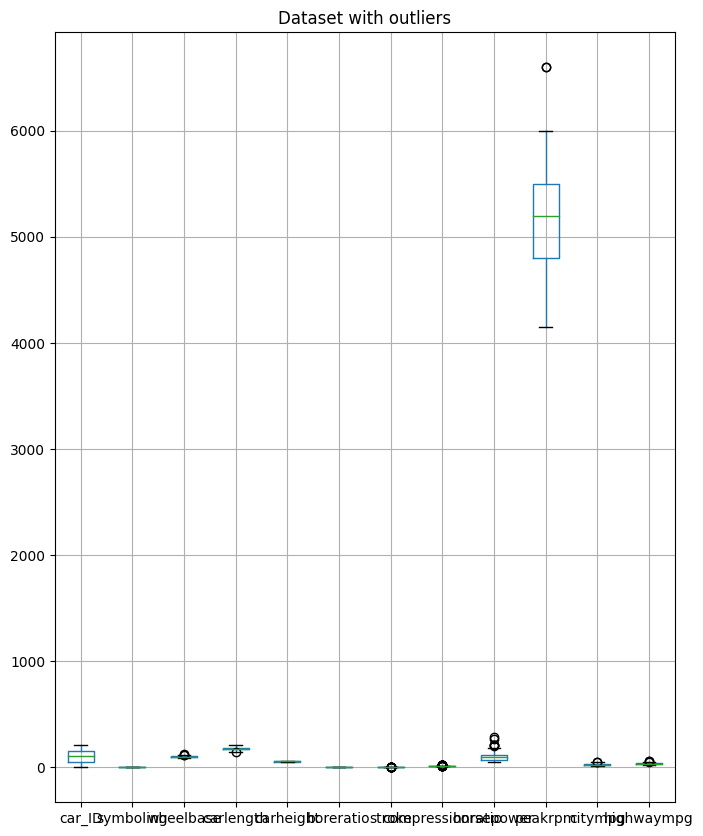

In [ ]:
plt.title("Dataset with outliers")
df.boxplot()
plt.show()

<ipython-input-151-8041c477e660>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df[cols].quantile(0.25)
<ipython-input-151-8041c477e660>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df[cols].quantile(0.75)
<ipython-input-151-8041c477e660>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-151-8041c477e660>:5: FutureWarning: Automatic reindexing on DataFram

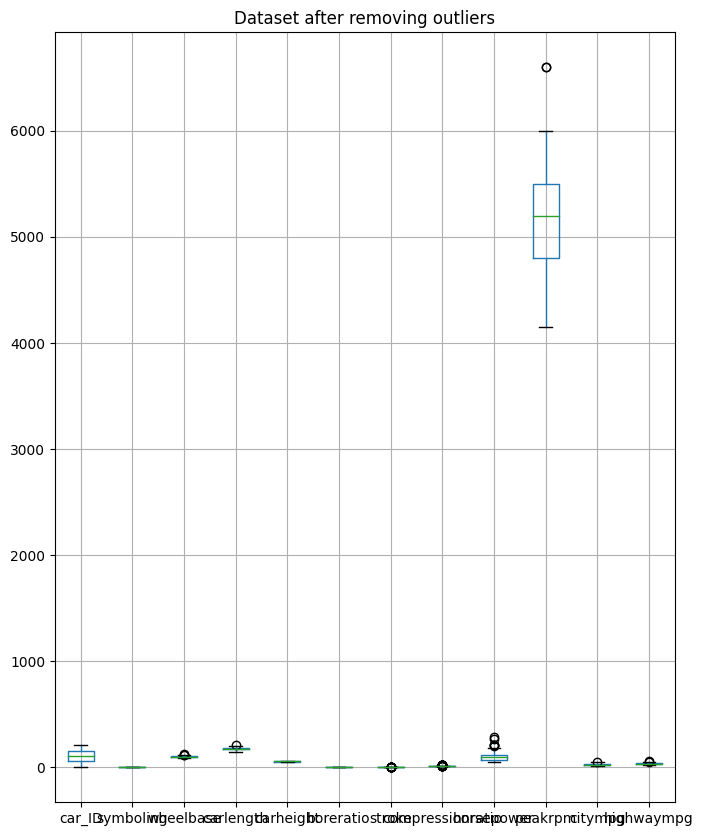

In [ ]:
cols = ['carlength', 'carheight', 'enginetype']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.title("Dataset after removing outliers")
df.boxplot()
plt.show()

In [ ]:
fuel_types = df['fueltype'].unique()
climate = list(fuel_types)
en= OrdinalEncoder(categories = [climate])
df['fueltype']=en.fit_transform(df[["fueltype"]])
df

<ipython-input-152-825e9dbd6b5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fueltype']=en.fit_transform(df[["fueltype"]])


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,carheight,enginetype,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,0.0,std,two,convertible,rwd,front,88.6,...,48.8,dohc,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,0.0,std,two,convertible,rwd,front,88.6,...,48.8,dohc,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,0.0,std,two,hatchback,rwd,front,94.5,...,52.4,ohcv,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,0.0,std,four,sedan,fwd,front,99.8,...,54.3,ohc,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,0.0,std,four,sedan,4wd,front,99.4,...,54.3,ohc,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0.0,std,four,sedan,rwd,front,109.1,...,55.5,ohc,mpfi,3.78,3.15,9.5,114,5400,23,28
201,202,-1,volvo 144ea,0.0,turbo,four,sedan,rwd,front,109.1,...,55.5,ohc,mpfi,3.78,3.15,8.7,160,5300,19,25
202,203,-1,volvo 244dl,0.0,std,four,sedan,rwd,front,109.1,...,55.5,ohcv,mpfi,3.58,2.87,8.8,134,5500,18,23
203,204,-1,volvo 246,1.0,turbo,four,sedan,rwd,front,109.1,...,55.5,ohc,idi,3.01,3.40,23.0,106,4800,26,27


In [ ]:
climate = ['0.0','1.0']
en= OrdinalEncoder(categories = [climate])
df['fueltype']=en.fit_transform(df[["fueltype"]])
df

<ipython-input-153-ab3a7010b375>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fueltype']=en.fit_transform(df[["fueltype"]])


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,carheight,enginetype,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,0.0,std,two,convertible,rwd,front,88.6,...,48.8,dohc,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,0.0,std,two,convertible,rwd,front,88.6,...,48.8,dohc,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,0.0,std,two,hatchback,rwd,front,94.5,...,52.4,ohcv,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,0.0,std,four,sedan,fwd,front,99.8,...,54.3,ohc,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,0.0,std,four,sedan,4wd,front,99.4,...,54.3,ohc,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0.0,std,four,sedan,rwd,front,109.1,...,55.5,ohc,mpfi,3.78,3.15,9.5,114,5400,23,28
201,202,-1,volvo 144ea,0.0,turbo,four,sedan,rwd,front,109.1,...,55.5,ohc,mpfi,3.78,3.15,8.7,160,5300,19,25
202,203,-1,volvo 244dl,0.0,std,four,sedan,rwd,front,109.1,...,55.5,ohcv,mpfi,3.58,2.87,8.8,134,5500,18,23
203,204,-1,volvo 246,1.0,turbo,four,sedan,rwd,front,109.1,...,55.5,ohc,idi,3.01,3.40,23.0,106,4800,26,27


In [ ]:
from sklearn.preprocessing import RobustScaler
cols_to_scale = ['wheelbase', 'carlength', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
scaler = RobustScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df

<ipython-input-154-e512ec3c43b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,carheight,enginetype,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,0.0,std,two,convertible,rwd,front,-1.063291,...,-1.514286,dohc,mpfi,0.369942,-2.033333,0.000000,0.347826,-0.285714,-0.272727,-0.333333
1,2,3,alfa-romero stelvio,0.0,std,two,convertible,rwd,front,-1.063291,...,-1.514286,dohc,mpfi,0.369942,-2.033333,0.000000,0.347826,-0.285714,-0.272727,-0.333333
2,3,1,alfa-romero Quadrifoglio,0.0,std,two,hatchback,rwd,front,-0.316456,...,-0.485714,ohcv,mpfi,-1.456647,0.600000,0.000000,1.282609,-0.285714,-0.454545,-0.444444
3,4,2,audi 100 ls,0.0,std,four,sedan,fwd,front,0.354430,...,0.057143,ohc,mpfi,-0.277457,0.366667,1.212121,0.152174,0.428571,0.000000,0.000000
4,5,2,audi 100ls,0.0,std,four,sedan,4wd,front,0.303797,...,0.057143,ohc,mpfi,-0.277457,0.366667,-1.212121,0.434783,0.428571,-0.545455,-0.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0.0,std,four,sedan,rwd,front,1.531646,...,0.400000,ohc,mpfi,1.086705,-0.466667,0.606061,0.413043,0.285714,-0.090909,-0.222222
201,202,-1,volvo 144ea,0.0,turbo,four,sedan,rwd,front,1.531646,...,0.400000,ohc,mpfi,1.086705,-0.466667,-0.363636,1.413043,0.142857,-0.454545,-0.555556
202,203,-1,volvo 244dl,0.0,std,four,sedan,rwd,front,1.531646,...,0.400000,ohcv,mpfi,0.624277,-1.400000,-0.242424,0.847826,0.428571,-0.545455,-0.777778
203,204,-1,volvo 246,1.0,turbo,four,sedan,rwd,front,1.531646,...,0.400000,ohc,idi,-0.693642,0.366667,16.969697,0.239130,-0.571429,0.181818,-0.333333


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import QuantileTransformer
df1 = pd.DataFrame()
df1["symboling"] = np.sqrt(df["symboling"])
df1["wheelbase"], parameters = stats.yeojohnson(df["wheelbase"])
df1["fueltype"], parameters = stats.yeojohnson(df["fueltype"])
df1["compressionratio"] = df["compressionratio"]
df1["horsepower"] = np.sqrt(df["horsepower"])
df1["peakrpm"] = df["peakrpm"]
df1["citympg"] = df["citympg"]
df1["highwaympg"] = df["highwaympg"]
df1["stroke"], parameters = stats.yeojohnson(df["stroke"])
qt = QuantileTransformer(output_distribution='normal', n_quantiles=df1.shape[0])
df1 = pd.DataFrame(qt.fit_transform(df1), columns=df1.columns)
skewness = df1.skew()
print(skewness)

symboling           0.213529
wheelbase          -0.373536
fueltype            2.723527
compressionratio   -0.316689
horsepower         -1.375211
peakrpm            -0.779758
citympg            -0.013902
highwaympg         -0.383786
stroke              0.382227
dtype: float64


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
import matplotlib
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
X = df1.drop("symboling",1)
y = df1["symboling"]
plt.figure(figsize=(12,10))

<ipython-input-156-259db0e35f56>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df1.drop("symboling",1)


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

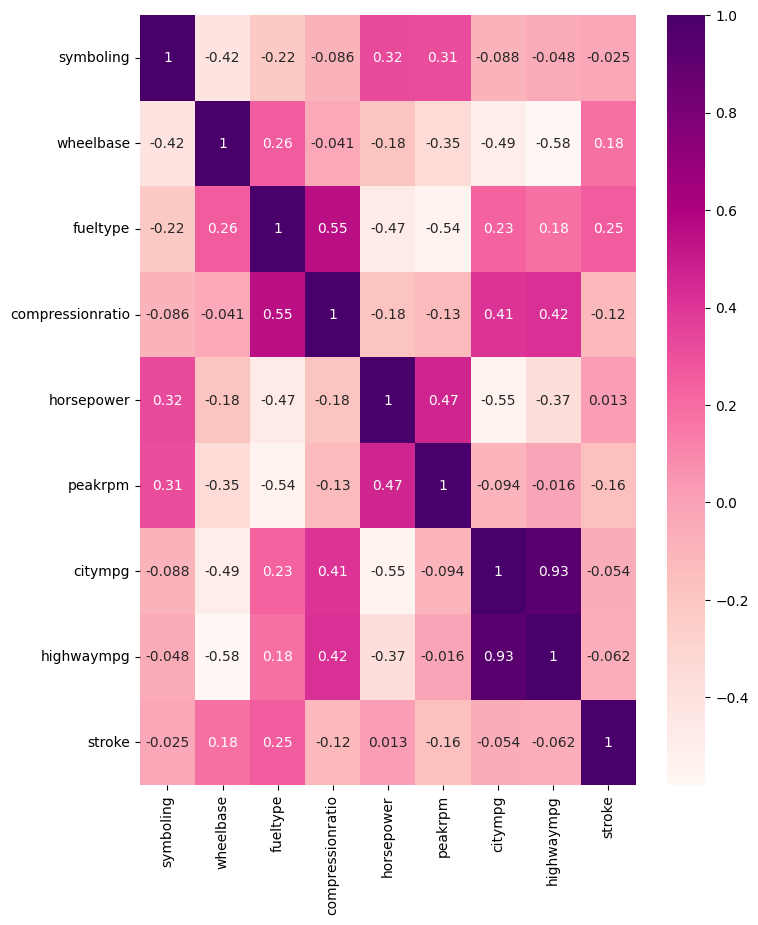

In [ ]:
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdPu)
plt.show()

In [ ]:
cor_target = abs(cor["symboling"])
relevant_features = cor_target[cor_target > 0.5].index
X_1 = sm.add_constant(X[relevant_features])
model = sm.OLS(y, X_1).fit()
pvalues = model.pvalues
print(pvalues)

const        0.223406
symboling    0.938459
dtype: float64


In [ ]:
import statsmodels.api as sm
cols = list(df.columns)
y = df['horsepower']
X = df.drop('horsepower', axis=1)
pmax = 1
while len(cols) > 0:
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if pmax > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

KeyError: ignored